**1.KNOWING MY DATA **

(head , info , isnull , unique)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/swiggy_file.csv')

->Initial Exploration

In [15]:
print('First 5 rows of my data : ')
display(df.head())

First 5 rows of my data : 


,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,La Pino'Z Pizza,"Pizzas, Pastas",4.0,10+ ratings,₹250 for two,2,FLAT DEAL\nFLAT ₹125 OFF\nUSE FLAT125ABOVE ₹69...,LALA LAJPAT RAI MARKET,No,Abohar
1,The Second Wife,"Indian, North Indian",3.6,50+ ratings,₹250 for two,2,"30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,No,Abohar
2,Tasty Bites,"Italian, Beverages",3.8,10+ ratings,₹200 for two,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Central Abohar,Yes,Abohar
3,Food Studio,"Pizzas, Burgers",3.5,8 ratings,₹49 for two,5,"50% OFF UPTO ₹100\nUSE TRYNEWABOVE ₹129, FLAT ...",Central Abohar,Yes,Abohar
4,Roll Express,"Fast Food, Snacks",4.3,100+ ratings,₹200 for two,2,DEAL OF DAY\n10% OFF UPTO ₹40\nUSE STEALDEALAB...,Circular Road,No,Abohar


In [16]:
print("\nData Shape:")
df.shape


Data Shape:


(140657, 10)

In [17]:
print("\nData types and missing values:")
display(df.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140657 entries, 0 to 140656
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Restaurant Name    140657 non-null  object
 1   Cuisine            140630 non-null  object
 2   Rating             140657 non-null  object
 3   Number of Ratings  126115 non-null  object
 4   Average Price      140657 non-null  object
 5   Number of Offers   140657 non-null  int64 
 6   Offer Name         138849 non-null  object
 7   Area               140655 non-null  object
 8   Pure Veg           140657 non-null  object
 9   Location           140657 non-null  object
dtypes: int64(1), object(9)
memory usage: 10.7+ MB


None

In [18]:
print("\nMissing values count:")
display(df.isnull().sum())


Missing values count:


,0
Restaurant Name,0
Cuisine,27
Rating,0
Number of Ratings,14542
Average Price,0
Number of Offers,0
Offer Name,1808
Area,2
Pure Veg,0
Location,0


Null values in -> Cuisine , Number of Ratings, Offer Name , Area

In [19]:
print("\nNumber of duplicates:", df.duplicated().sum())


Number of duplicates: 1336


In [20]:
print("\nUnique values per column:")
display(df.nunique())


Unique values per column:


,0
Restaurant Name,100665
Cuisine,2133
Rating,43
Number of Ratings,17
Average Price,501
Number of Offers,6
Offer Name,19367
Area,16307
Pure Veg,2
Location,581


**2.Data Cleaning **

(to_numeric , drop rows with missing values[dropna] , drop_duplicates, mapping , astype)

In [21]:
#Converting Rating to numeric (3.9 , 4.6 , NEW -> 4, 5, 0)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Cleaning 'Number of Ratings' column - extract numeric values
df['Number of Ratings'] = df['Number of Ratings'].str.extract('(\d+)')[0]
df['Number of Ratings'] = pd.to_numeric(df['Number of Ratings'], errors='coerce')

# Cleaning 'Average Price' column - extract numeric values
df['Average Price'] = df['Average Price'].str.extract('(\d+)')[0]
df['Average Price'] = pd.to_numeric(df['Average Price'], errors='coerce')

# Droping rows with missing values
df.dropna(subset=['Cuisine', 'Rating', 'Number of Ratings', 'Average Price'], inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Cleaning 'Pure Veg' column by mapping true and false
df['Pure Veg'] = df['Pure Veg'].map({'Yes': True, 'No': False})

# Cleaning 'Number of Offers' column
df['Number of Offers'] = df['Number of Offers'].astype(int)

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)


In [22]:
print("After cleaning:")
print(f"New shape: {df.shape}")
print("\nMissing values after cleaning:")
display(df.isnull().sum())

After cleaning:
New shape: (105864, 10)

Missing values after cleaning:


,0
Restaurant Name,0
Cuisine,0
Rating,0
Number of Ratings,0
Average Price,0
Number of Offers,0
Offer Name,1135
Area,2
Pure Veg,0
Location,0


**3.EXPLORATORY DATA ANALYSIS(EDA)**

->3.1 Univariate Analysis

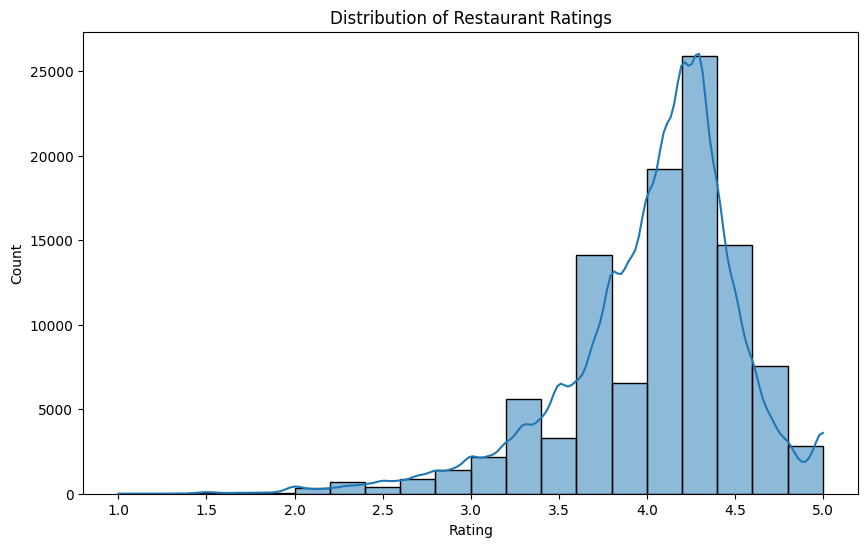


 count    105864.000000
mean          4.038306
std           0.495581
min           1.000000
25%           3.800000
50%           4.100000
75%           4.300000
max           5.000000
Name: Rating, dtype: float64


In [23]:
# Rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()
print("\n",df['Rating'].describe())

The avg rating given by people is 4.038 with std deviation of 0.495581

And with min and max rating is 1 and 5 respectively

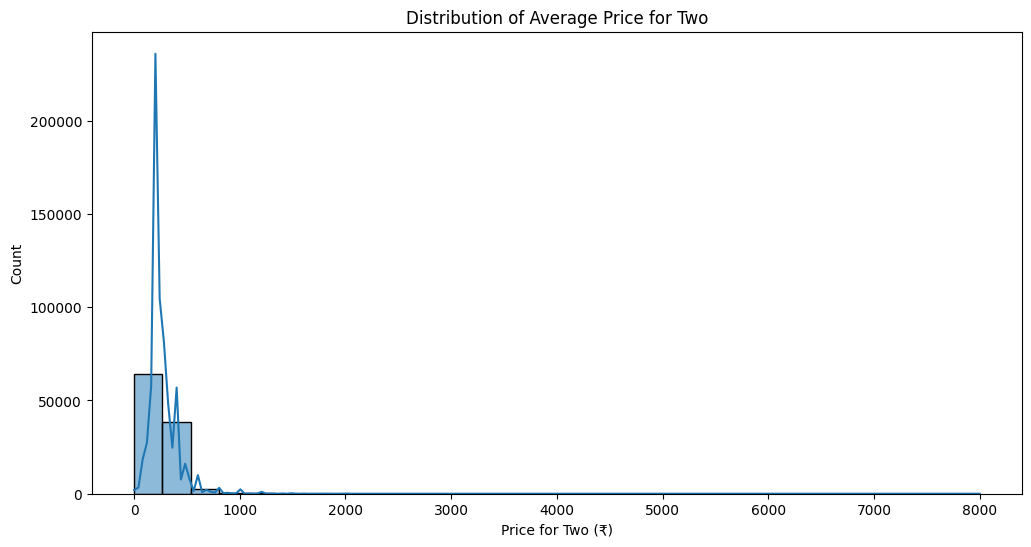


 count    105864.000000
mean        270.014802
std         142.179040
min           1.000000
25%         200.000000
50%         250.000000
75%         300.000000
max        8000.000000
Name: Average Price, dtype: float64


In [24]:
# Average Price distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Average Price'], bins=30, kde=True)
plt.title('Distribution of Average Price for Two')
plt.xlabel('Price for Two (₹)')
plt.ylabel('Count')
plt.show()
print("\n",df['Average Price'].describe())

The avg price distributed for two is 270 Rs. with deviation of 142 Rs.

where the min and max price is 1Rs and 8000Rs

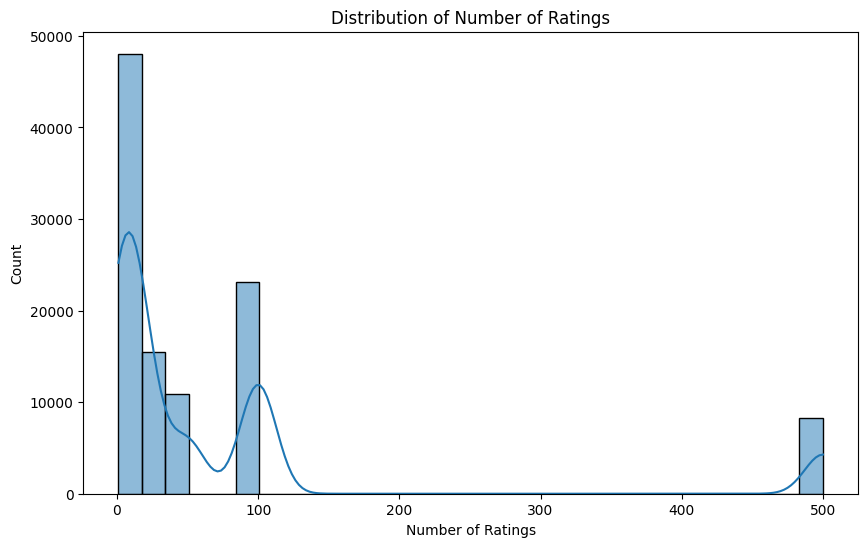


 count    105864.000000
mean         71.636222
std         130.408321
min           1.000000
25%           6.000000
50%          20.000000
75%         100.000000
max         500.000000
Name: Number of Ratings, dtype: float64


In [25]:
# Number of Ratings distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Number of Ratings'], bins=30, kde=True)
plt.title('Distribution of Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()
print("\n",df['Number of Ratings'].describe())

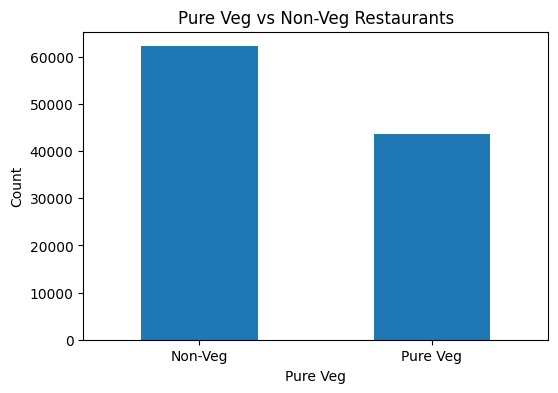


 count     105864
unique         2
top        False
freq       62245
Name: Pure Veg, dtype: object


In [26]:
# Pure Veg distribution
plt.figure(figsize=(6, 4))
df['Pure Veg'].value_counts().plot(kind='bar')
plt.title('Pure Veg vs Non-Veg Restaurants')
plt.xticks([0, 1], ['Non-Veg', 'Pure Veg'], rotation=0)
plt.ylabel('Count')
plt.show()
print("\n",df['Pure Veg'].describe())

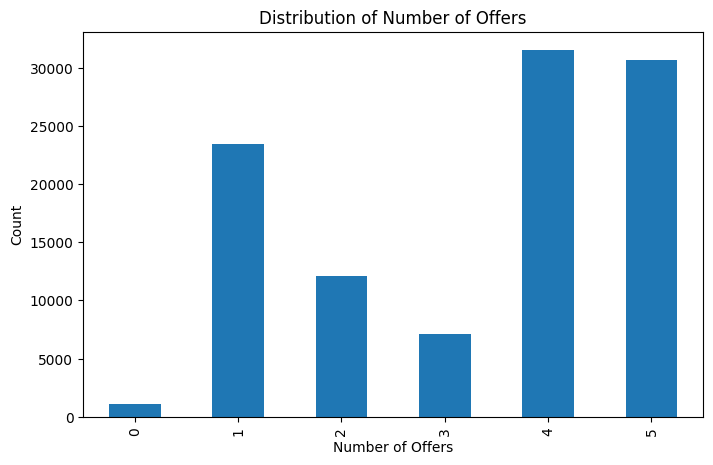


 count    105864.000000
mean          3.287425
std           1.570808
min           0.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: Number of Offers, dtype: float64


In [27]:
# Number of Offers distribution
plt.figure(figsize=(8, 5))
df['Number of Offers'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Number of Offers')
plt.xlabel('Number of Offers')
plt.ylabel('Count')
plt.show()
print("\n",df['Number of Offers'].describe())

No. of offers are max offered by 4 by more than 30000 restraus



->3.2 Bivariate Analysis

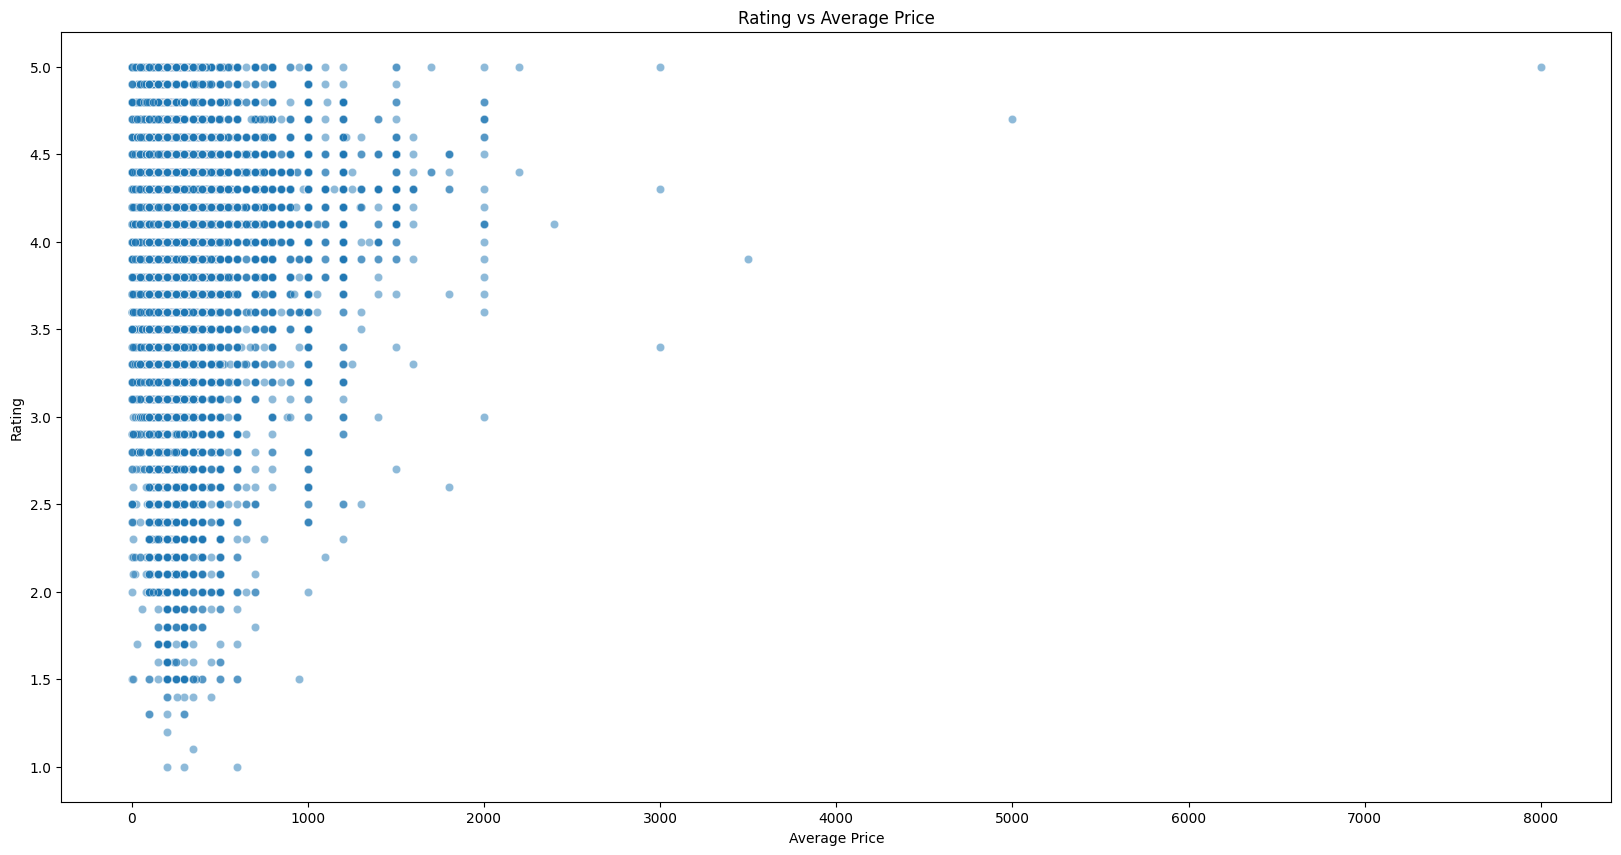


 count    105864.000000
mean        270.014802
std         142.179040
min           1.000000
25%         200.000000
50%         250.000000
75%         300.000000
max        8000.000000
Name: Average Price, dtype: float64

 count    105864.000000
mean          4.038306
std           0.495581
min           1.000000
25%           3.800000
50%           4.100000
75%           4.300000
max           5.000000
Name: Rating, dtype: float64


In [28]:
# Rating vs Average Price
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Average Price', y='Rating', data=df, alpha=0.5 )
plt.title('Rating vs Average Price')
plt.show()
print("\n",df['Average Price'].describe())
print("\n",df['Rating'].describe())

Firstly , most of food avg price lies between 0-1000Rs

And if the avg price increasing it's increasing above 3.5 Rating Restraus

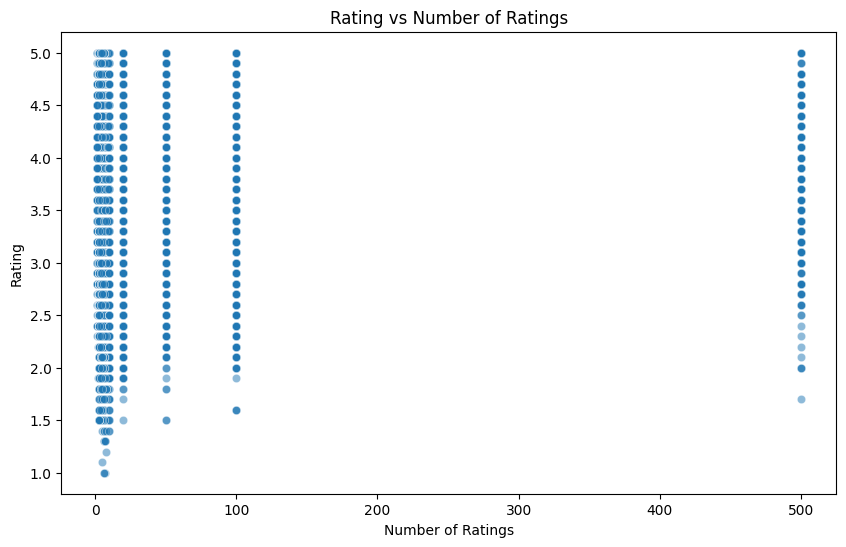

In [29]:
# Rating vs Number of Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number of Ratings', y='Rating', data=df, alpha=0.5)
plt.title('Rating vs Number of Ratings')
plt.show()


From this , i can see very few of the people gave rating



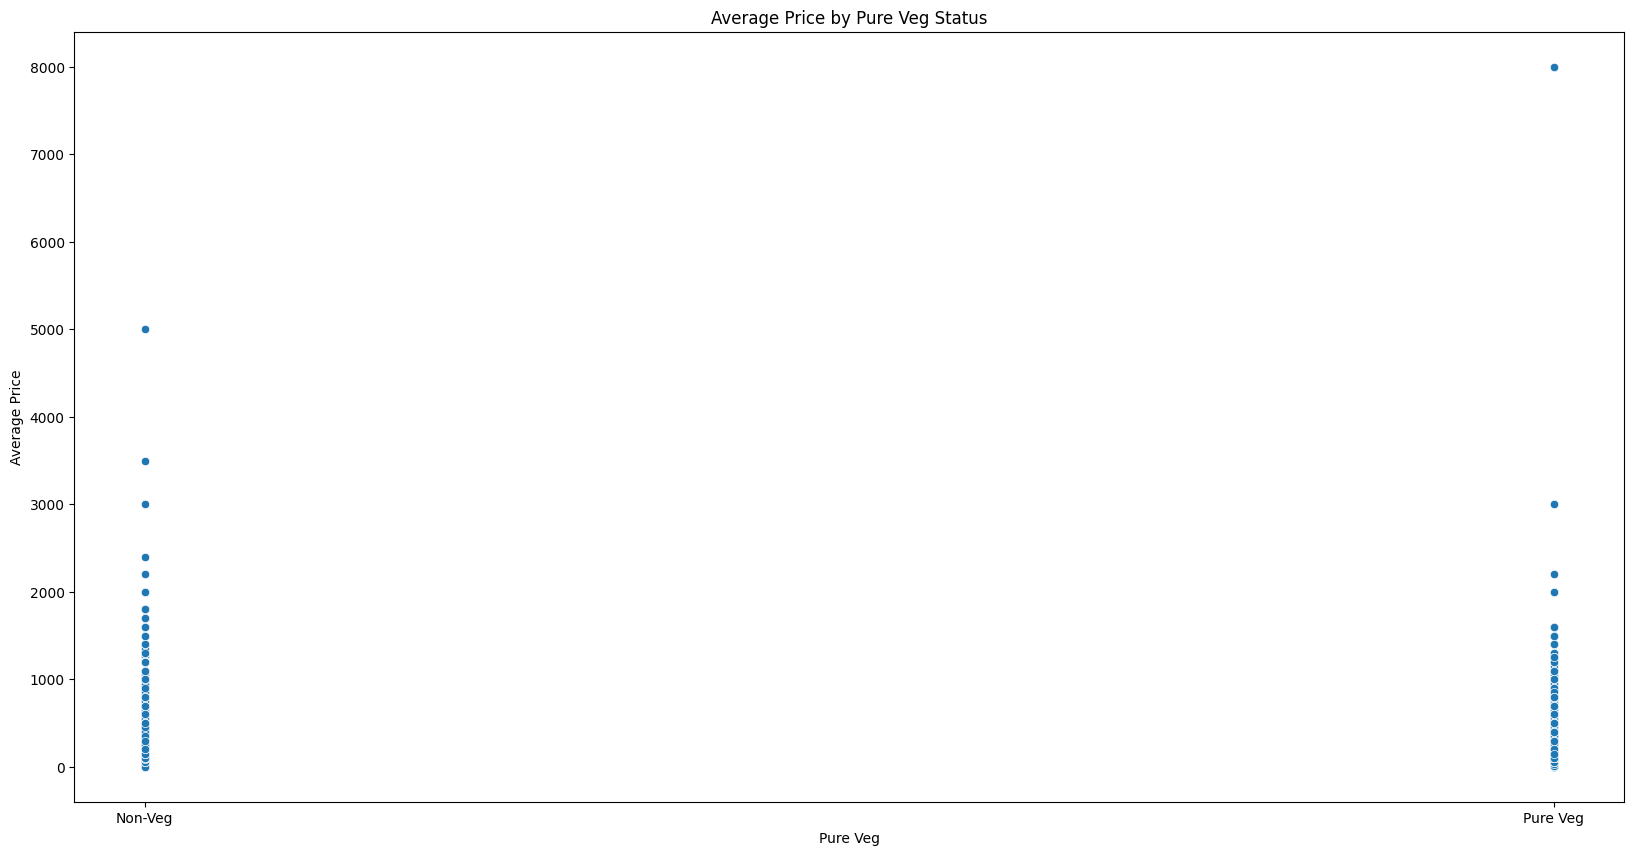

In [30]:
# Average Price by Pure Veg
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Pure Veg', y='Average Price', data=df)
plt.title('Average Price by Pure Veg Status')
plt.xticks([0, 1], ['Non-Veg', 'Pure Veg'])
plt.show()

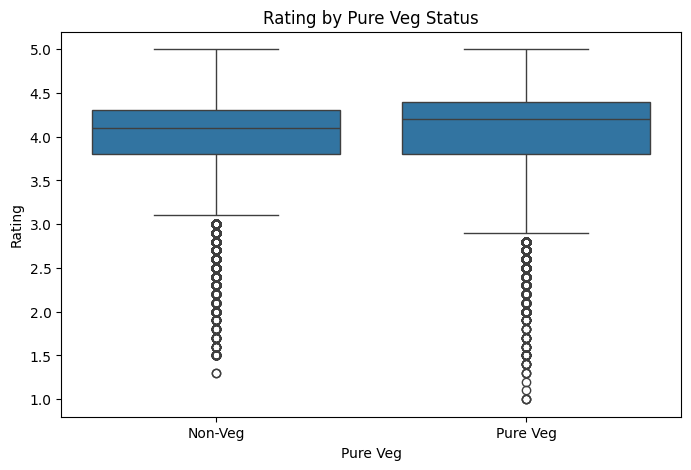

In [31]:
# Rating by Pure Veg
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pure Veg', y='Rating', data=df)
plt.title('Rating by Pure Veg Status')
plt.xticks([0, 1], ['Non-Veg', 'Pure Veg'])
plt.show()

->3.3 Top Cuisines Analysis

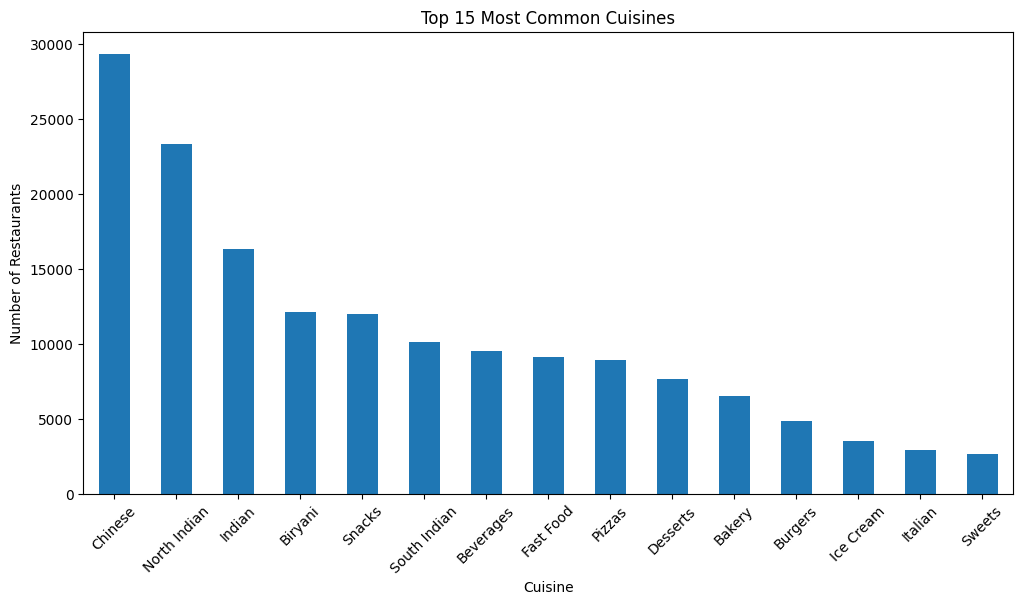

In [32]:
from wordcloud import WordCloud
# Extract and count individual cuisines
all_cuisines = df['Cuisine'].str.split(', ').explode()
top_cuisines = all_cuisines.value_counts().head(15)

plt.figure(figsize=(12, 6))
top_cuisines.plot(kind='bar')
plt.title('Top 15 Most Common Cuisines')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

I can see Chinese Cuisine is the most common with getting ordred in more than 25000 restraus

And least is Sweets

And the avg one is Beverages and Fast Food

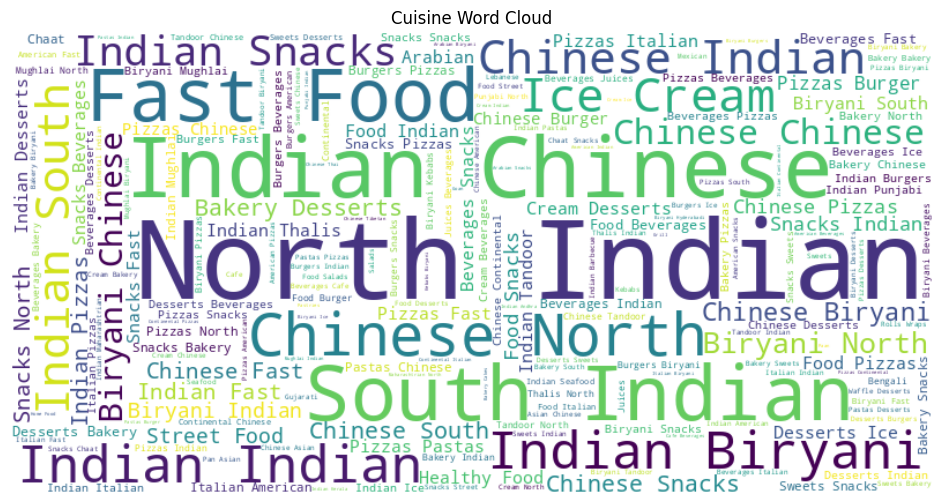

In [33]:
# Word cloud for cuisines
cuisine_text = ' '.join(all_cuisines.dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cuisine_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Cuisine Word Cloud')
plt.show()

Most common are - > North indian, Chinese , Indian , Fast Food , South indian

->3.4 Location Analysis

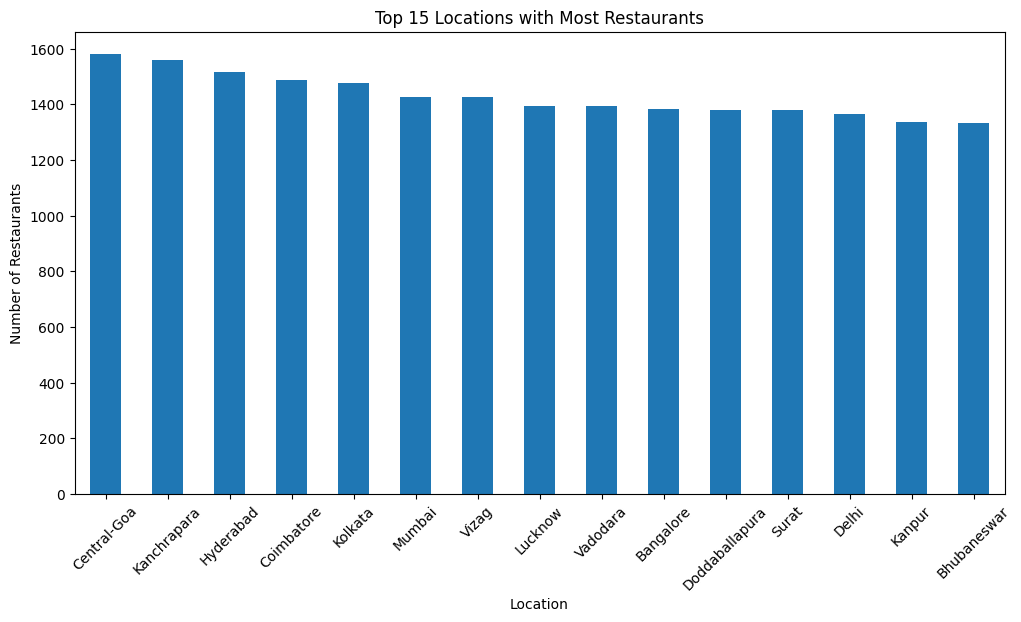

In [34]:
# Top locations
top_locations = df['Location'].value_counts().head(15)

plt.figure(figsize=(12, 6))
top_locations.plot(kind='bar')
plt.title('Top 15 Locations with Most Restaurants')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

Most Restraus are in -> Central Goa , Kanchrapara , Hyderabad Side

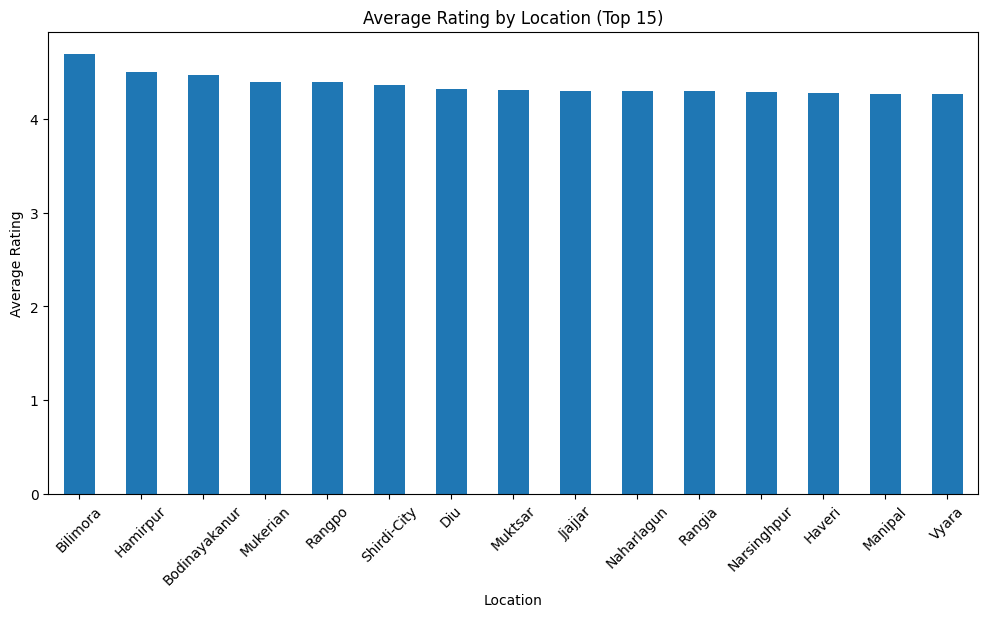

In [35]:
# Average Rating by Location (top 15 locations)
top_loc_avg_rating = df.groupby('Location')['Rating'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
top_loc_avg_rating.plot(kind='bar')
plt.title('Average Rating by Location (Top 15)')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

**4. Feature Engineering**

In [36]:
# Create a binary feature for popular restaurants (based on rating threshold)
df['Popular'] = df['Rating'] >= 4.0

# Create price categories
bins = [0, 200, 400, 600, 800, 1000, float('inf')]
labels = ['<200', '200-400', '400-600', '600-800', '800-1000', '>1000']
df['Price Range'] = pd.cut(df['Average Price'], bins=bins, labels=labels)

# Count number of cuisines per restaurant
df['Cuisine Count'] = df['Cuisine'].str.split(', ').str.len()

# Create binary features for top cuisines
top_cuisine_list = top_cuisines.index.tolist()
for cuisine in top_cuisine_list[:10]:  # Top 10 cuisines
    df[f'Cuisine_{cuisine}'] = df['Cuisine'].str.contains(cuisine).astype(int)

# Display new features
display(df[['Popular', 'Price Range', 'Cuisine Count'] + [f'Cuisine_{cuisine}' for cuisine in top_cuisine_list[:3]]].head())

,Popular,Price Range,Cuisine Count,Cuisine_Chinese,Cuisine_North Indian,Cuisine_Indian
0,True,200-400,2,0,0,0
1,False,200-400,2,0,1,1
2,False,<200,2,0,0,0
3,False,<200,2,0,0,0
4,True,<200,2,0,0,0


In [37]:
df.isnull().sum()

,0
Restaurant Name,0
Cuisine,0
Rating,0
Number of Ratings,0
Average Price,0
Number of Offers,0
Offer Name,1135
Area,2
Pure Veg,0
Location,0


**5. Clustering Analysis**

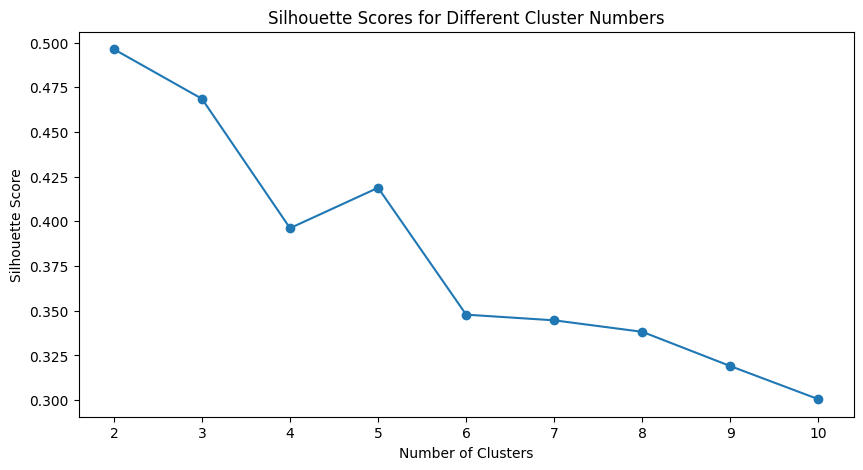

,Rating,Average Price,Number of Ratings,Cuisine Count
Cluster,,,,
0,4.138510,275.669917,500.000000,1.808716
1,4.029773,269.533268,35.160952,1.773814


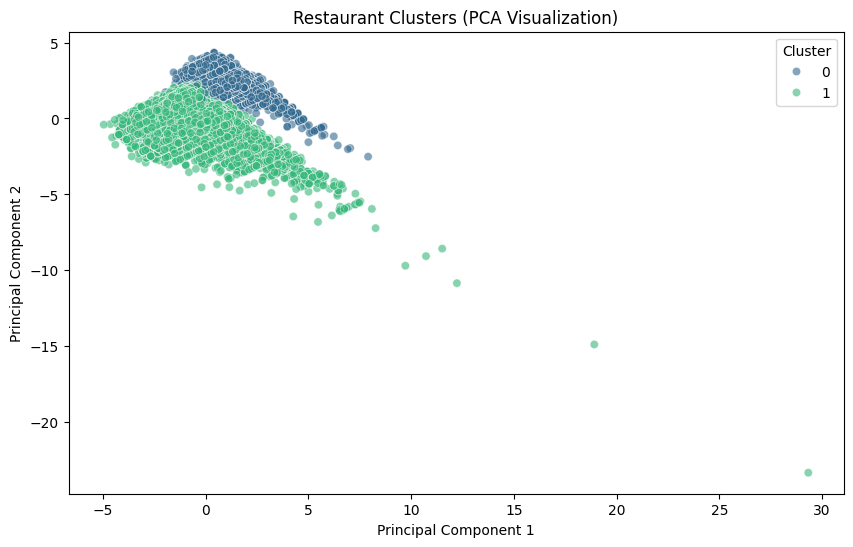

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

#Preparing data for clustering

cluster_data = df[['Rating', 'Average Price', 'Number of Ratings', 'Cuisine Count']].dropna()
#Select only numeric and important columns to cluster and drop null rows in those columns
cluster_data = (cluster_data - cluster_data.mean()) / cluster_data.std()  # Standardize
#Since to make contribute each features equally , make them standardrize by minusing means and dividing by std deviation

# Determining optimal number of clusters using silhouette score

silhouette_scores = [] #Initialized an empty list to store silhouette scores for different cluster numbers
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_data)
    score = silhouette_score(cluster_data, kmeans.labels_) #Higher scores indicate better defined clusters
    silhouette_scores.append(score)  #Stores the score for this k value

#using Elbow Curve to see
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')  #marker='o' adds circular markers at each point
plt.title('Silhouette Scores for Different Cluster Numbers')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Performing K-means clustering with optimal k

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  #Get the k with highest silhouette score , +2 because our range started at 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)  #final kmeans model with optimal 'k' ->highest score one
df['Cluster'] = kmeans.fit_predict(cluster_data)  #make new column Cluster which store fitted and predicted value of cluster of each row

# Analyzing clusters

cluster_analysis = df.groupby('Cluster')[['Rating', 'Average Price', 'Number of Ratings', 'Cuisine Count']].mean()
display(cluster_analysis)

# Visualising clusters (using first two principal components for 2D visualization)

from sklearn.decomposition import PCA
# reduce dimensions to 2 for visualization
pca = PCA(n_components=2)   #w because we visualzing 2D Graph(human understandable) , n_component=3 means 3D Graph
principal_components = pca.fit_transform(cluster_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1],
                hue=df['Cluster'], palette='viridis', alpha=0.6)
#hue -> color points Cluster
#alpha=0.6 makes points slightly transparent
#x = pc1 , y = pc2
plt.title('Restaurant Clusters (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [39]:
display(optimal_k)

2

At k=2 , there is best silhouette score , soo optimal k is 2

In [40]:
print("Sentiment analysis would require review text data which isn't in this dataset.")

Sentiment analysis would require review text data which isn't in this dataset.


**6. Key Insights and Recommendations**

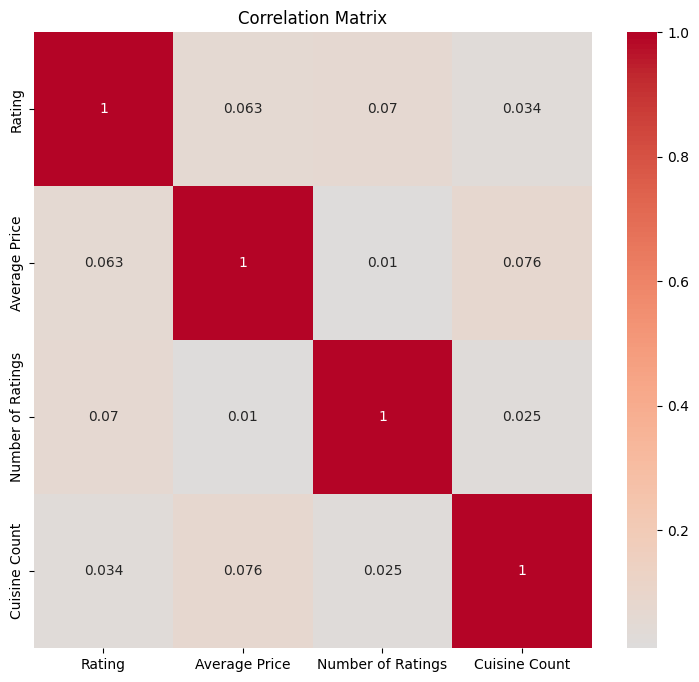

In [43]:
#Correlation Matrix Calculation

corr_matrix = df[['Rating', 'Average Price', 'Number of Ratings', 'Cuisine Count']].corr() #selected numric cols and calculated pairwise Pearson correlation coefficients between all selected columns
#Returns a square matrix where each cell shows correlation between two variables (-1 to 1)

#Heatmap Visualization

plt.figure(figsize=(9, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
#annot=True -> display the correlation value in each cell
#map='coolwarm'-> uses a blue-white-red color gradient
#center=0-> makes 0 correlation the midpoint of the color scale

plt.title('Correlation Matrix')
plt.show()


***From this matrix i can say points such as : ***

(i) Rating has very weak positive correlations with:

->Average Price (0.063)

->Number of Ratings (0.070)

->Cuisine Count (0.034)

Means restaurant's rating is not strongly influenced by these variables in isolation. Customer satisfaction may depend more on qualitative aspects

(ii) Average Price vs Cuisine Count

->Correlation = 0.076

Slight positive relationship—restaurants offering more cuisines tend to charge slightly more

In [44]:
#Key Insights:

print("\nKey Insights:")

print("1. Rating Distribution:", f"{df['Rating'].mean():.2f} average with std dev {df['Rating'].std():.2f}")
#average rating and its standard deviation

print("2. Price Distribution:", f"₹{df['Average Price'].mean():.2f} average price for two")
#Displays average price with Rupee symbol

print("3. Most common cuisines:", ', '.join(top_cuisines.index[:5].tolist()))
#Shows top 5 cuisines from previous analysis

print(f"4. {df['Pure Veg'].mean()*100:.1f}% of restaurants are pure vegetarian")
#Calculates percentage of pure veg restaurants

#Recommendations Section

print("\nRecommendations:")

print("1. Focus on maintaining high ratings as they correlate with more customer reviews")
#Suggested by viewing correlation between Rating and Number of Ratings

print("2. Competitive pricing strategy based on location and cuisine type clusters")
print("3. Consider expanding popular cuisine offerings in areas where they're underrepresented")
print("4. For pure veg restaurants, emphasize quality as they tend to have higher average prices")



Key Insights:
1. Rating Distribution: 4.04 average with std dev 0.50
2. Price Distribution: ₹270.01 average price for two
3. Most common cuisines: Chinese, North Indian, Indian, Biryani, Snacks
4. 41.2% of restaurants are pure vegetarian

Recommendations:
1. Focus on maintaining high ratings as they correlate with more customer reviews
2. Competitive pricing strategy based on location and cuisine type clusters
3. Consider expanding popular cuisine offerings in areas where they're underrepresented
4. For pure veg restaurants, emphasize quality as they tend to have higher average prices


***CONCLUSION ***

-> Using KMeans clustering, I segmented restaurants into 2 optimal clusters (as determined by silhouette score = ~0.5), and analyzed them based on their rating, pricing, number of ratings, and cuisine variety.


->*Cluster 0:*

-Average Rating: 4.14

-Average Price: ₹275.67

-Number of Ratings: 500.0

-Cuisine Count: 1.81

This cluster represents established, popular restaurants with:

-High number of reviews (500+),

-Strong ratings (~4.14), and

-A decent variety of cuisines.

These restaurants offer a great mix of quality, value, and reach, indicating high customer trust and repeat usage. They likely form the core performers on the platform and are important to retain and promote.



-> *Cluster 1:*

-Average Rating: 4.03

-Average Price: ₹269.53

-Number of Ratings: 35.16

-Cuisine Count: 1.77

Interpretation:

-This cluster includes newer or less popular restaurants, with:

-Much fewer reviews, suggesting lower visibility or customer base,

-Slightly lower ratings and prices, and

-A similar cuisine range.

These may represent emerging restaurants, budget-friendly options, or businesses in early growth stages. Some may need marketing, promotions, or quality improvements to compete with top performers.

Although both clusters have similar ratings and pricing, the key differentiator is popularity and visibility (number of ratings).

Cluster 0 shows high engagement and trust, whereas Cluster 1 may benefit from platform-driven support like campaigns, discount boosts, or delivery optimizations to grow further.



In [45]:
# Save cleaned data for future use
df.to_csv('swiggy_restaurants_cleaned.csv', index=False)
print("Cleaned dataset saved to 'swiggy_restaurants_cleaned.csv'")

Cleaned dataset saved to 'swiggy_restaurants_cleaned.csv'
